# Housing Loan Eligibility

Loan Eligible Dataset


Problem Statement:

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [40]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# loading dataset
df_3 = pd.read_csv('loan-train.csv')
df_3.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


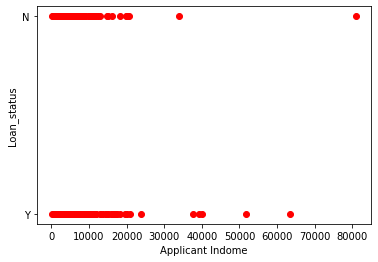

In [42]:

plt.scatter(df_3.ApplicantIncome, df_3.Loan_Status, color = 'red')
plt.xlabel("Applicant Indome")
plt.ylabel("Loan_status")
plt.show()

In [43]:
Property_Ar = df_3['Property_Area']

In [44]:
# Removing the unnecessary variables
df_3.drop(['Loan_ID', 'Dependents', 'Property_Area'], axis =1, inplace = True)

In [45]:
# Finding the total number of null values for each variables
df_3.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

In [46]:
# Removing the null values
df_4 = df_3.dropna()
df_4

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Y


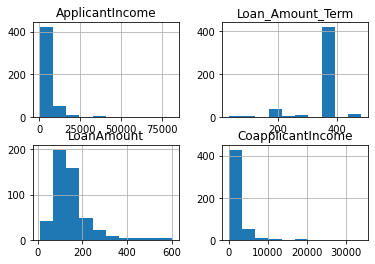

In [47]:
# Plotting the histogram for continuous variables
graph = df_4[['ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']]
graph.hist()
plt.show()

In [48]:
# Finding the number of categories for the variable Education
df_4['Education'].value_counts()

Graduate        389
Not Graduate    101
Name: Education, dtype: int64

In [49]:
Gen = df_4 ['Gender']
Marr = df_4['Married']
Edu = df_4['Education']
Self_emp = df_4['Self_Employed']

In [50]:
df_4.drop(['Gender', 'Married', 'Education', 'Self_Employed'], axis = 1, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
Y = df_4['Loan_Status']


In [52]:
df_4.drop('Loan_Status', axis = 1, inplace = True )

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
df_4.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
5,5417,4196.0,267.0,360.0,1.0


In [54]:
# Transforming the Categorical Variable into Numerical 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gender = le.fit_transform(Gen)
marriage = le.fit_transform(Marr)
education = le.fit_transform(Edu)
self_employment = le.fit_transform(Self_emp)
Y_1 = le.fit_transform(Y)

In [55]:
df_4['gender'] = gender
df_4['marriage'] = marriage
df_4['education'] = education
df_4['self_employment'] = self_employment

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [56]:
df_4.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender,marriage,education,self_employment
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0
4,6000,0.0,141.0,360.0,1.0,1,0,0,0
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1


In [57]:
x = df_4
y = Y_1

In [58]:
# Spliting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 0)

In [59]:
# Training data for X
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender,marriage,education,self_employment
509,13262,0.0,40.0,360.0,1.0,0,0,0,0
258,14683,2100.0,304.0,360.0,1.0,1,1,0,0
455,3859,0.0,96.0,360.0,1.0,1,1,0,0
381,5941,4232.0,296.0,360.0,1.0,1,0,0,0
247,6608,0.0,137.0,180.0,1.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
406,2167,2400.0,115.0,360.0,1.0,1,1,1,0
245,6050,4333.0,120.0,180.0,1.0,1,0,0,1
151,2577,3750.0,152.0,360.0,1.0,1,1,0,1
60,2500,3796.0,120.0,360.0,1.0,1,1,0,0


In [60]:
# Testing data for X
x_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender,marriage,education,self_employment
297,4666,0.0,135.0,360.0,1.0,0,1,0,0
227,6250,1695.0,210.0,360.0,1.0,1,1,0,0
549,2785,2016.0,110.0,360.0,1.0,1,1,0,0
408,8300,0.0,152.0,300.0,0.0,1,1,0,0
18,4887,0.0,133.0,360.0,1.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
58,8080,2250.0,180.0,360.0,1.0,1,1,0,0
216,150,1800.0,135.0,360.0,1.0,1,1,0,0
69,4300,0.0,136.0,360.0,0.0,0,0,0,0
511,6065,2004.0,250.0,360.0,1.0,1,1,0,0


In [61]:
# Training data for Y
y_train

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [62]:
# Testing data for Y
y_test

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

## Fitting Logistic Regression to check which applicant are elegible for loan

In [63]:
# Fitting Logisting Regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0)
logistic.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [64]:
# Prediction and comparison with test data set
y_pred = logistic.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]]


## Making the Confusion Matrix

In [65]:
# Setting Confusion Matrix and Finding the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13 23]
 [ 3 84]]


0.7886178861788617

## Fitting the KNN Classifier to Check Whick Applicants are Eligible for Loan

In [66]:
## Fitting KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
K_NN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
K_NN.fit(x_train, y_train)

KNeighborsClassifier()

In [67]:
# Prediction and Comparison with Test Dataset
y_pred = K_NN.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]]


## Confusion Matrix

In [68]:
## Setting Up Confusion Matrix and Finding Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 3 33]
 [15 72]]


0.6097560975609756

## Fitting the Decision-tree Classifier to Check Which Applicants are Eligible for Loan

In [69]:
## Fitting Decision-tree Classifier on Training Dataset
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [70]:
## Prediction and Comparison with Test Dataset
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]]


## Making the Confusion Matrix

In [71]:
## Setting up Confusion Matrix and Finding Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[18 18]
 [20 67]]


0.6910569105691057

## Fitting the Support Vector Machine (SVM) Classifier to Check if the Applicants are Eligible for Loan

In [72]:
## Fitting SVM Classifier with Training Dataset
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [73]:
## Prediction and Comparison with Test Dataset
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]]


## Making the Confusion Matrix

In [74]:
## Setting up Confusion Matrix and Finding Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11 25]
 [ 4 83]]


0.7642276422764228

## Fitting the Random Forest Classifier to Check if the Applicants are Eligible for Loan

In [75]:
## Fitting Random Forest Classifier with Training Dataset
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [76]:
## Prediction and Comparison with Test Dataset
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]]


## Making the Confusion Matrix

In [77]:
## Setting up Confusion Matrix and Finding Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15 21]
 [13 74]]


0.7235772357723578